# IRIS Classification using Decision Tree Classifier

This is in reference to the <a href = "https://www.kaggle.com/uciml/iris"> dataset </a> from Kaggle. 

The aim of this notebook is to classify different iris plants on basis of different charecteristics given by the data.

<img src = "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

The following packages were used in classification:-
    1. numpy - for linear algebra functions
    2. pandas - creating a data frame from the dataset
    3. sklearn - used for creating model and evaluation of model
    4. seaborn - data visualization
    5. matplotlib - For plotting the data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Exploratory Data Analysis

It's good to have a look in the dataset before the choice of model to be used 

## Load the dataset ##

The dataset is read using pandas library and stored as a Data Frame 

In [2]:
df = pd.read_csv("IRIS.csv")
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


## Gathering information of the dataset ##

A detailed look in the dataset in the dataset shows that there are 150 rows of data present and there is no null values which needs to be taken care of. There are 3 kinds of species mentioned in the Species column of the dataset. The Species are mainly "Iris-virginica", "Iris-versicolor" and "Iris-setosa". 

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB
None


In [4]:
print(df["Species"].value_counts())

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64


## Data Visualization ##

The column of "Id" is mainly used for keeping a track of experiments and is not a influencing factor in determining the species and if it is fed to a model, then it may happen that the ids adds some information which is not required. Hence, the id column is dropped.

A visualization of data suggest that the different species appears in clusters with each other, therefore a Decision Tree Algorithm will be beneficial. 

Also, on analyzing the boxplot, the interquartile ranges for the species with respect to each categories. It clealy suggest that they are almost imdependent of each other and form  particular set of values for which we can classify them to their repective categories.

In [5]:
df = df.drop(columns = "Id")

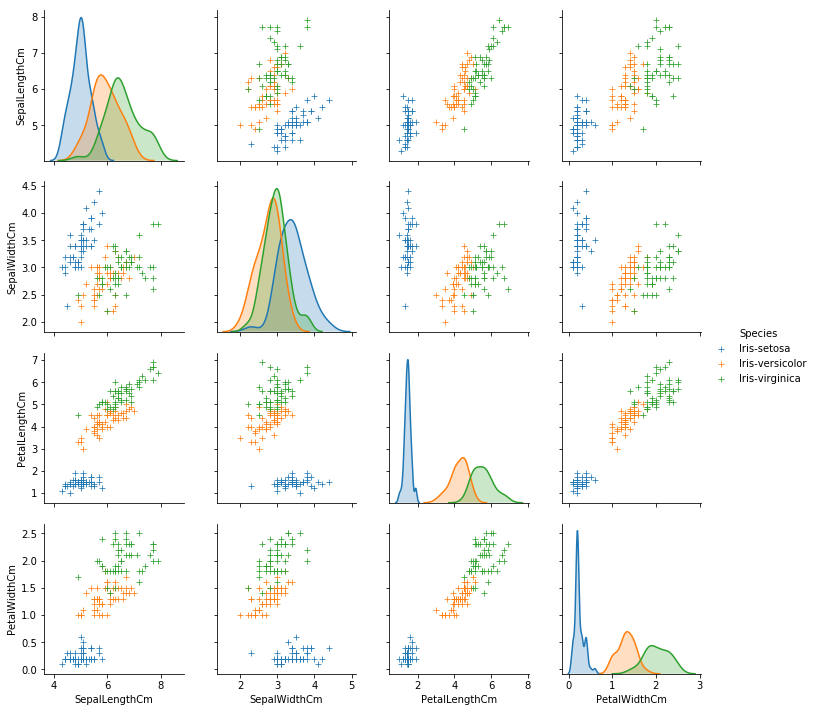

In [6]:
sns.pairplot(df, hue='Species', markers='+');

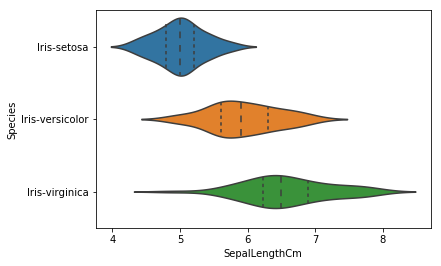

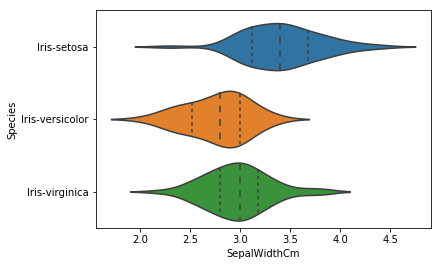

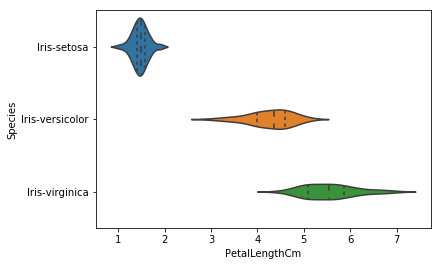

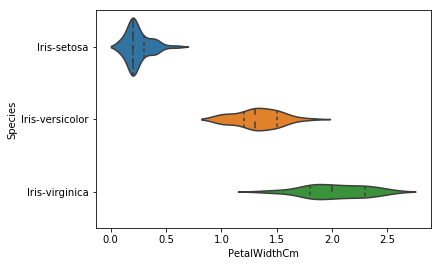

In [7]:
sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

# Data Preparation #

The data is prepared for creating a model and evaluating the results. All the parameters except species are in float/integer format. Hence the Species column is encoded for evaluating our model.

In [8]:
print(df["Species"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [9]:
encoder_species = {}
for i,species in enumerate(df["Species"].unique()):
    encoder_species[species] = i
print(encoder_species)

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [10]:
df["Species"].replace(encoder_species, inplace = True)

In [11]:
print(df["Species"].value_counts())

2    50
1    50
0    50
Name: Species, dtype: int64


# Model Creation and Evaluation #

The dataset is divided into training (70%) and test set(30%). A Decision Tree Classifier model is created and trained on the training set. The test set is used for evaluation of the model. During the split, the random_state is set to 40 as to create a uniformly distributed training and test dataset. As, an uneven training data will cause the accuracy to fall down.

The Decision Tree Classifier is chosen as our prediction model. The Decision Tree takes into account all the criteria for classification and makes decision to which category the following charecteristics belongs to. The algorithm forms a tree structures with each child node represents a particuar choice made for the decision in the root node.

In [12]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 40)

In [14]:
clf = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
clf.fit(X_train, Y_train)
pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)

accuracy_train = accuracy_score(Y_train, pred_train, normalize = True)
accuracy_test = accuracy_score(Y_test, pred_test, normalize = True)

In [15]:
cm = confusion_matrix(Y_test, pred_test)

In [16]:
print(cm)

[[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]


In [17]:
print(accuracy_train, accuracy_test)

1.0 1.0


# Result #

The model seems to be a perfect fit and classifies all the data correctly. 

The training set accuracy = 100%

The test set accuracy = 100%